## Kaplan-Meier 생존 곡선 분석

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, NelsonAalenFitter   # 생존분석용 라이브러리 
from lifelines.statistics import logrank_test   #그룹 간 생존 차이를 비교


In [2]:
# data load
df = pd.read_csv('/home/alpaco/sryang/lung_cancer_data.csv') #Lung Ca data
df.head()

,Patient_ID,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,Patient0000,68,Male,Current Smoker,81.678677,Lower Lobe,Stage III,Surgery,44,Hispanic,...,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,Patient0001,58,Male,Never Smoked,78.448272,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,...,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,Patient0002,44,Male,Former Smoker,67.714305,Lower Lobe,Stage I,Chemotherapy,69,African American,...,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,Patient0003,72,Male,Current Smoker,70.806008,Lower Lobe,Stage III,Chemotherapy,95,African American,...,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,Patient0004,37,Female,Never Smoked,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,...,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23658 entries, 0 to 23657
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        23658 non-null  object 
 1   Age                               23658 non-null  int64  
 2   Gender                            23658 non-null  object 
 3   Smoking_History                   23658 non-null  object 
 4   Tumor_Size_mm                     23658 non-null  float64
 5   Tumor_Location                    23658 non-null  object 
 6   Stage                             23658 non-null  object 
 7   Treatment                         23658 non-null  object 
 8   Survival_Months                   23658 non-null  int64  
 9   Ethnicity                         23658 non-null  object 
 10  Insurance_Type                    23658 non-null  object 
 11  Family_History                    23658 non-null  object 
 12  Como

In [4]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Smoking_History', 'Tumor_Size_mm',
       'Tumor_Location', 'Stage', 'Treatment', 'Survival_Months', 'Ethnicity',
       'Insurance_Type', 'Family_History', 'Comorbidity_Diabetes',
       'Comorbidity_Hypertension', 'Comorbidity_Heart_Disease',
       'Comorbidity_Chronic_Lung_Disease', 'Comorbidity_Kidney_Disease',
       'Comorbidity_Autoimmune_Disease', 'Comorbidity_Other',
       'Performance_Status', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse', 'Hemoglobin_Level',
       'White_Blood_Cell_Count', 'Platelet_Count', 'Albumin_Level',
       'Alkaline_Phosphatase_Level', 'Alanine_Aminotransferase_Level',
       'Aspartate_Aminotransferase_Level', 'Creatinine_Level', 'LDH_Level',
       'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level', 'Potassium_Level',
       'Sodium_Level', 'Smoking_Pack_Years'],
      dtype='object')

'Patient_ID'환자 등록번호,
'Age' 나이, 'Gender'성별, 
'Smoking_History' 흡연력, 'Family_History' 가족력, 
'Tumor_Size_mm' 종양크기, 'Tumor_Location' 위치, 'Stage' 병기,
'Treatment' 치료, 'Survival_Months' 생존기간,
'Ethnicity'인종,
'Insurance_Type' 보험종류,

- 만성질환 
    'Comorbidity_Diabetes'당뇨, 'Comorbidity_Hypertension' 고혈압, 'Comorbidity_Heart_Disease' 심장질환,
    'Comorbidity_Chronic_Lung_Disease'만성폐질환, 'Comorbidity_Kidney_Disease' 신장질환,
    'Comorbidity_Autoimmune_Disease' 자가만성질환, 'Comorbidity_Other' 기타 만성질환,

- ECOG
    'Performance_Status',

- V/S
    'Blood_Pressure_Systolic','Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse',

- 혈액수치 
    'Hemoglobin_Level','White_Blood_Cell_Count','Platelet_Count', 

- 전해질수치 
    'Albumin_Level','Alkaline_Phosphatase_Level', 'Alanine_Aminotransferase_Level',
    'Aspartate_Aminotransferase_Level', 'Creatinine_Level', 'LDH_Level',
    'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level', 'Potassium_Level',
    'Sodium_Level',

- 흡연: 담배팩 /년
    'Smoking_Pack_Years'

### data 전처리(생존기간, 현재는 모두 사망)
'Survival_Months' 생존기간 분석 

    - 흡연과의 연관성 분석 'Smoking_History', 'Smoking_Pack_Years'
    - 성별과의 연관성 분석 'Gender'
    - 나이와의 연관성 분석 'Age'
    - 병기와의 연관성 분석 'Stage' 병기
    - 조직형과의 연관성 분석 'Tumor_Size_mm' 종양크기, 'Tumor_Location' 위치
    - 치료법과의 연관성 분석 'Treatment' 치료
    - 'Ethnicity'인종

    - 만성질환의 유무 ? 어떤 만성질환이 가장 많았을까 ? 

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(durations = df['Survival_month'], event_observed = df[''])
kmf.plot_survival_function()

In [ ]:

kmf.fit(durations = df['Survival_Months'], event_observed = df['Survived'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 23658 total observations, 0 right-censored observations>

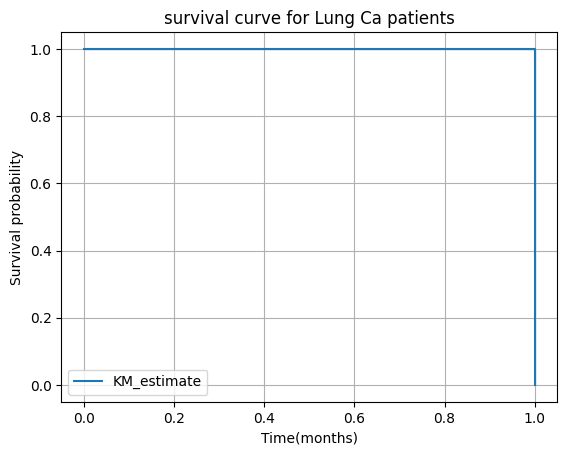

Median survival time:  1.0
1 year survival rate:  0.0
5 year survival rate:  0.0


In [16]:

kmf.plot()
plt.title("survival curve for Lung Ca patients")
plt.xlabel("Time(months)")
plt.ylabel("Survival probability")
plt.grid(True)
plt.show()

print("Median survival time: ", kmf.median_survival_time_) # 중앙생존시간
print("1 year survival rate: ", kmf.survival_function_at_times(12).values[0]) # 1년 생존율
print("5 year survival rate: ", kmf.survival_function_at_times(60).values[0])   # 5년 생존율

## 성별에 따른 폐암환자 생존곡선 분석   

In [ ]:
# 데이터 전처리 
df.loc[df.Gender == 'Male', 'sex'] = "male" # 남성
df.loc[df.Gender == 'Female', 'sex'] = "female" # 여성 

In [ ]:
male = df.query("sex == male")
female = df.query("sex == female")

In [25]:
from lifelines import KaplanMeierFitter
    
kmf_m = KaplanMeierFitter() 
kmf_f = KaplanMeierFitter() 

In [33]:
kmf_m.fit(durations=male["survival_Months"], 
          event_observed=male["dead"], label="Male")
kmf_f.fit(durations=female["survival_Months"],
          event_observed=female["dead"], label="female")        

KeyError: 'survival_Months'

AttributeError: 'KaplanMeierFitter' object has no attribute 'survival_function_'

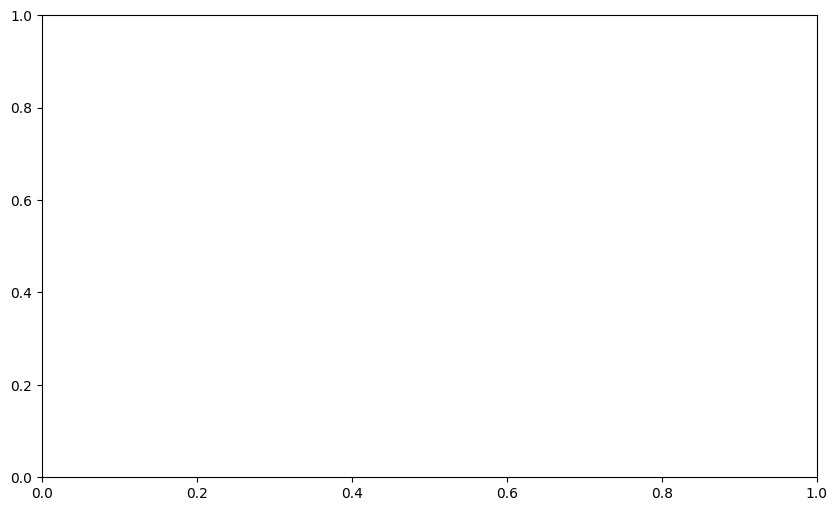

In [31]:
plt.figure(figsize=(10,6))
kmf_m.plot()
kmf_f.plot()
plt.title("Survival")
plt.xlabel("Time(months)")
plt.ylabel("Survival probability")
plt.grid(True)
plt.legend()  

### Location : Vuno X-ray & CT AI를 활용한 Detection 
시각화 + 논문 ? 

- 종양의 위치와 생존 기간의 관련성
